Autor: luismateoh, santiagobed

Día de creación: 2023/04/22

Descripción: Filtros

#Filtros

Los filtros de imagen son herramientas esenciales en el procesamiento de imágenes digitales. Se utilizan para mejorar la calidad de la imagen, eliminar el ruido y las imperfecciones, resaltar características importantes y extraer información útil. Existen muchos tipos diferentes de filtros, cada uno con sus propias características y aplicaciones.

## Filtro de media 

**Fórmula matemática:**

$f(x,y) = \frac{1}{mn} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} I_{x+i, y+j}$

(1/MN) * sumatorio de valores de píxeles en la vecindad MxN.

**Explicación:** Este filtro se utiliza para suavizar una imagen eliminando detalles de alta frecuencia. La media de los valores de los píxeles en la vecindad determinada por MN se calcula para cada píxel de la imagen. El resultado es una imagen suavizada con detalles finos eliminados.

**Ventajas:** es fácil de implementar y reduce el ruido en imágenes.

**Desventajas:** puede producir efecto de borrosidad en la imagen y no es eficiente para reducir el ruido de alta frecuencia.



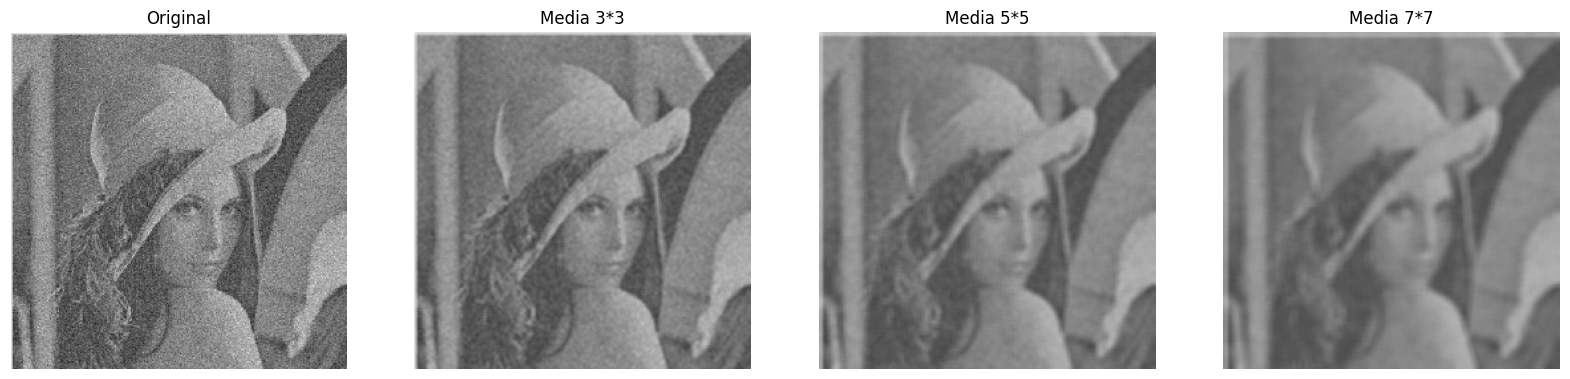

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('filtros/image_1.png')

kernel_sizes = [3, 5, 7]
filtered_imgs = []

for size in kernel_sizes:
    kernel = np.ones((size,size),np.float32)/(size*size)
    filtered_img = cv2.filter2D(img,-1,kernel)
    filtered_imgs.append(filtered_img)

plt.figure(figsize=(20, 8))
plt.subplot(141), plt.imshow(img), plt.title('Original')
plt.axis('off')

for i in range(len(filtered_imgs)):
    plt.subplot(142+i), plt.imshow(filtered_imgs[i]), plt.title(f'Media {kernel_sizes[i]}*{kernel_sizes[i]}')
    plt.axis('off')

plt.show()

## Filtro de mediana 

**Fórmula matemática:** 

$f(x,y) = median(I_{x+i, y+j})_{0 \leq i < m, 0 \leq j < n}$

El valor del píxel central en una vecindad NxN de píxeles se reemplaza por la mediana de los valores de píxeles en la vecindad.

**Explicación:** Este filtro también se utiliza para suavizar una imagen eliminando detalles de alta frecuencia. En lugar de calcular la media de los valores de los píxeles, este filtro calcula la mediana de los valores de los píxeles en la vecindad determinada por N. El resultado es una imagen suavizada con detalles finos eliminados, pero con menos borrosidad que el filtro de media.

**Ventajas:** reduce el ruido de forma efectiva en imágenes con ruido impulsivo (salt and pepper) sin perder detalles finos de la imagen.

**Desventajas:** no es tan efectivo en reducir ruido de baja frecuencia y puede producir efecto de borrosidad en la imagen.


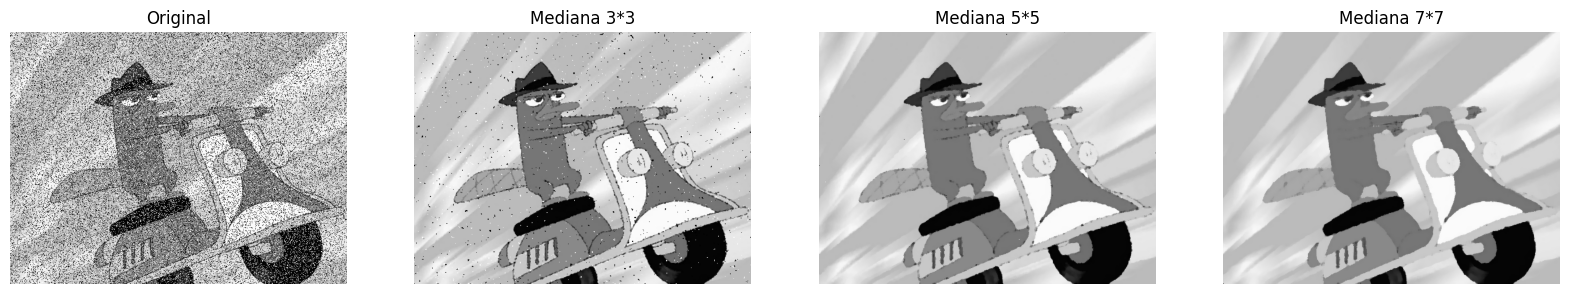

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('filtros/image_2.png')

kernel_sizes = [3, 5, 7]
filtered_imgs = []

for size in kernel_sizes:
    filtered_img = cv2.medianBlur(img, size)
    filtered_imgs.append(filtered_img)

plt.figure(figsize=(20, 8))
plt.subplot(141), plt.imshow(img), plt.title('Original')
plt.axis('off')

for i in range(len(filtered_imgs)):
    plt.subplot(142+i), plt.imshow(filtered_imgs[i]), plt.title(f'Mediana {kernel_sizes[i]}*{kernel_sizes[i]}')
    plt.axis('off')

plt.show()

## Filtro logarítmico 

**Fórmula matemática:** 

$f(x,y) = c \log(1 + I(x,y))$

**Explicación:** Este filtro se utiliza para mejorar el contraste de una imagen. La intensidad de los píxeles se escala logarítmicamente para aumentar la diferencia entre los valores de los píxeles oscuros y claros. La constante c es un factor de escala que se utiliza para ajustar la intensidad resultante.

**Ventajas:** es útil para aumentar el contraste en imágenes de baja iluminación.

**Desventajas:** puede producir efecto de amplificación de ruido en imágenes con ruido de alta frecuencia.

C:\Users\luism\AppData\Local\Temp\ipykernel_21460\2835533769.py:8: RuntimeWarning: divide by zero encountered in log
  dst = c * np.log(1 + img).astype(np.float32)


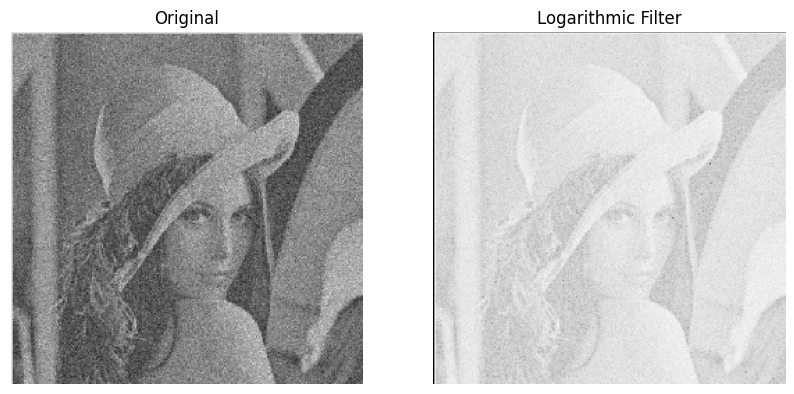

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('filtros/image_1.png')

c = 255 / np.log(1 + np.max(img))
dst = c * np.log(1 + img).astype(np.float32)
dst = cv2.convertScaleAbs(dst)

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.axis('off')

plt.subplot(122), plt.imshow(dst, cmap='gray'), plt.title('Logarithmic Filter')
plt.axis('off')

plt.show()

## Filtro de cuadro normalizado 
**Fórmula matemática:**

$f(x,y) = \frac{1}{nm} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} I_{x+i, y+j}^2$

(1/N^2) * sumatorio de valores de píxeles en la vecindad NxN.

**Explicación:** Este filtro es similar al filtro de media, pero cada valor de píxel se divide por el número total de píxeles en la vecindad determinada por N. El resultado es una imagen suavizada con menos borrosidad que el filtro de media.

**Ventajas:** es útil para resaltar regiones de alta intensidad en la imagen.

**Desventajas:** puede producir efecto de amplificación de ruido en imágenes con ruido de alta frecuencia.

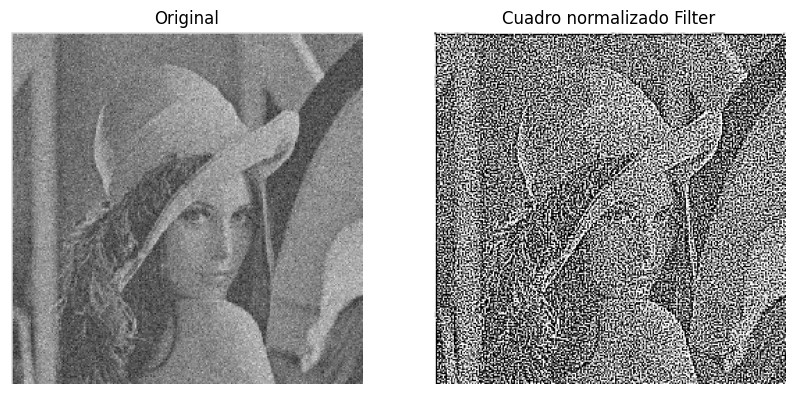

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('filtros/image_1.png')
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
dst = cv2.filter2D(img,-1,kernel)

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.axis('off')

plt.subplot(122), plt.imshow(dst, cmap='gray'), plt.title('Cuadro normalizado Filter')
plt.axis('off')

plt.show()

## Filtro gaussiano 

**Fórmula matemática:** 

$f(x,y) = \frac{1}{2 \pi \sigma^2} \sum_{i=-k}^{k} \sum_{j=-k}^{k} I_{x+i, y+j} e^{-(i^2+j^2)/(2\sigma^2)}$

**Explicación:** Este filtro se utiliza para suavizar una imagen eliminando detalles de alta frecuencia. Se calcula una matriz de convolución Gaussiana y se aplica a cada píxel de la imagen. La cantidad de suavizado se controla mediante el parámetro σ.

**Ventajas:** reduce el ruido de forma efectiva en imágenes con ruido de baja y alta frecuencia sin producir efecto de borrosidad.

**Desventajas:** puede perder detalles finos en la imagen.

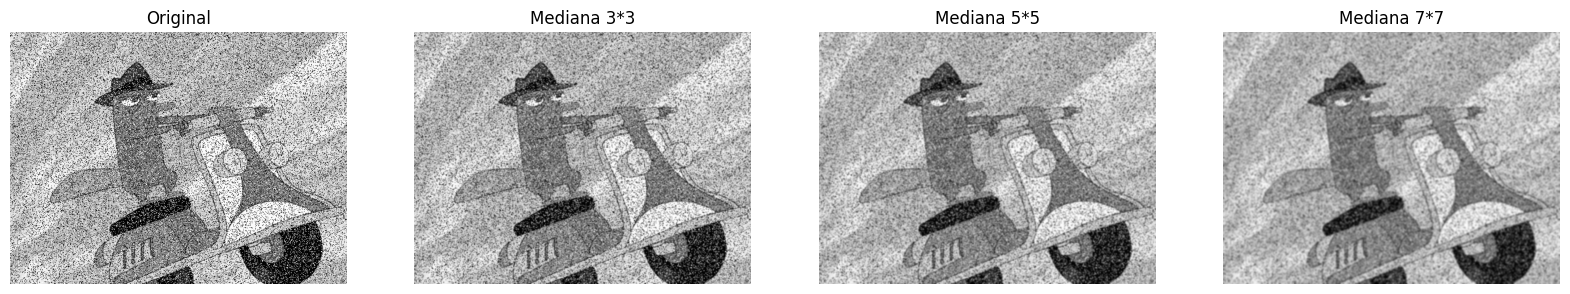

In [21]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('filtros/image_2.png')

kernel_sizes = [3, 5, 7]
filtered_imgs = []

for size in kernel_sizes:
    filtered_img = cv2.GaussianBlur(img, (size,size),0)
    filtered_imgs.append(filtered_img)

plt.figure(figsize=(20, 8))
plt.subplot(141), plt.imshow(img), plt.title('Original')
plt.axis('off')

for i in range(len(filtered_imgs)):
    plt.subplot(142+i), plt.imshow(filtered_imgs[i]), plt.title(f'Mediana {kernel_sizes[i]}*{kernel_sizes[i]}')
    plt.axis('off')

plt.show()

## Filtro Laplace 

**Fórmula matemática:**

$f(x,y) = \sum_{i=-1}^{1} \sum_{j=-1}^{1} c(i,j) I_{x+i, y+j}$, donde $c(i,j)$ es la matriz de convolución: $\begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$

**Explicación:** Este filtro se utiliza para resaltar bordes en una imagen. El filtro de Laplace calcula la segunda derivada de la imagen en ambas direcciones x e y y luego suma los resultados. Esto produce una imagen donde los bordes se destacan como picos y valles.

**Ventajas:** es útil para resaltar los bordes y los detalles finos de la imagen.

**Desventajas:** puede producir efecto de amplificación de ruido en imágenes con ruido de alta frecuencia.

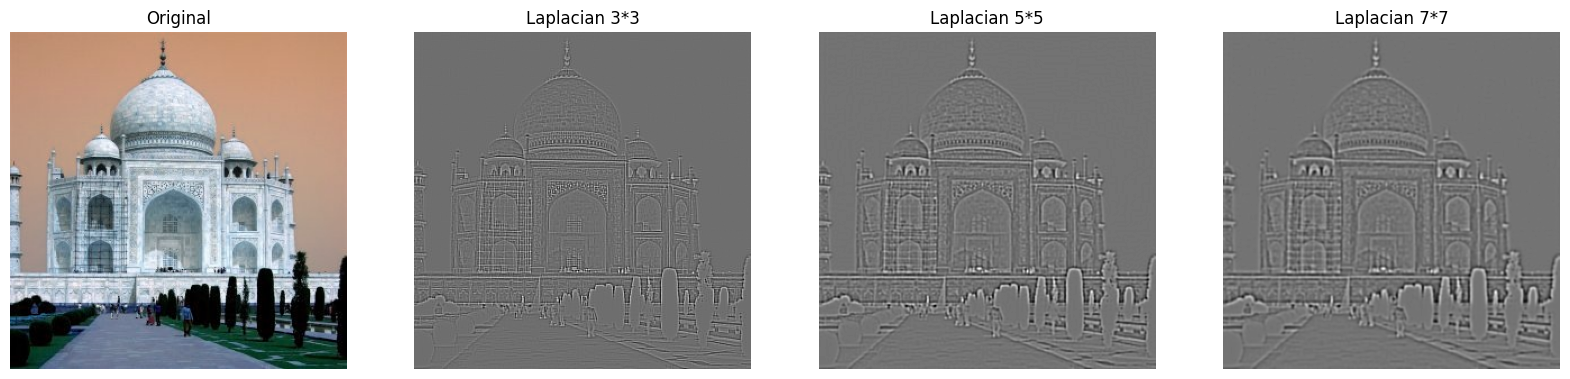

In [56]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('filtros/image_3.png',1)

src_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel_sizes = [3, 5, 7]
filtered_imgs = []

for size in kernel_sizes:
    filtered_img = cv2.Laplacian(src_gray, cv2.CV_64F , ksize=size)
    filtered_imgs.append(filtered_img)

plt.figure(figsize=(20, 8))
plt.subplot(141), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.axis('off')

for i in range(len(filtered_imgs)):
    plt.subplot(142+i), plt.imshow(filtered_imgs[i], cmap='gray'), plt.title(f'Laplacian {kernel_sizes[i]}*{kernel_sizes[i]}')
    plt.axis('off')

plt.show()


## Filtro Sobel 

**Fórmula matemática para la detección de bordes horizontales:**

$f(x,y) = \sum_{i=-1}^{1} \sum_{j=-1}^{1} c_x(i,j) I_{x+i, y+j}$, donde $c_x(i,j)$ es la matriz de convolución: $\begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$


**Fórmula matemática para la detección de bordes verticales:**

$f(x,y) = \sum_{i=-1}^{1} \sum_{j=-1}^{1} c_y(i,j) I_{x+i, y+j}$, donde $c_y(i,j)$ es la matriz de convolución: $\begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$

Se utiliza un operador de convolución de máscara para cada dirección (horizontal y vertical)

**Explicación:** Este filtro se utiliza para resaltar bordes en una imagen. Se aplican dos operadores de convolución (máscaras) a la imagen, una para detectar bordes horizontales y otra para detectar bordes verticales. El resultado es una imagen donde los bordes se destacan en blanco y el fondo en negro.

**Ventajas:** es útil para detectar bordes en imágenes y puede ser utilizado para implementar algoritmos de detección de características (como detección de esquinas).

**Desventajas:** puede producir efecto de amplificación de ruido en imágenes con ruido de alta frecuencia.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


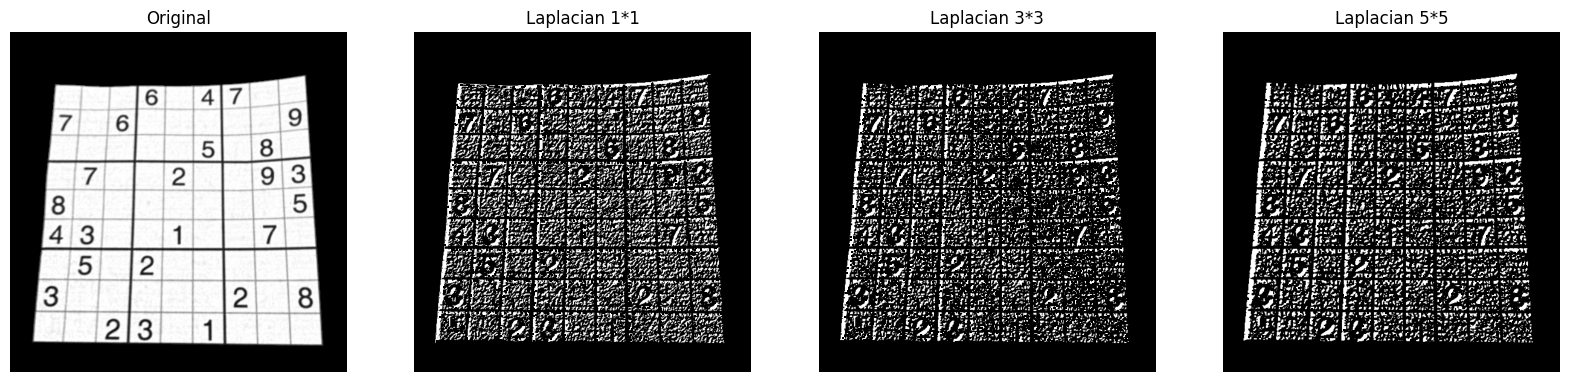

In [48]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('filtros/image_4.png',0)

kernel_sizes = [1, 3, 5]
filtered_imgs_x = []
filtered_imgs_y = []
filtered_imgs = []

img = cv2.imread('filtros/image_4.png')

#dst = cv2.bitwise_or(dstx, dsty)

for size in kernel_sizes:
    filtered_img_x = dstx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=size)
    filtered_imgs_x.append(filtered_img_x)
    filtered_img_y = dsty = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=size)
    filtered_imgs_x.append(filtered_img_y)

    filtered_imgs.append(cv2.bitwise_or(dstx, dsty))

plt.figure(figsize=(20, 8))
plt.subplot(141), plt.imshow(img), plt.title('Original')
plt.axis('off')

for i in range(len(filtered_imgs)):
    plt.subplot(142+i), plt.imshow(filtered_imgs[i]), plt.title(f'Laplacian {kernel_sizes[i]}*{kernel_sizes[i]}')
    plt.axis('off')

plt.show()


## Filtro Canny 

**Fórmula matemática:**

El filtro Canny utiliza varios pasos para detectar bordes en una imagen, por lo que no se puede expresar con una sola fórmula matemática.

El filtro Canny utiliza varios pasos para detectar bordes en una imagen, incluyendo:

* Aplicar un filtro gaussiano para suavizar la imagen.
* Calcular el gradiente de la imagen para determinar la dirección del cambio de intensidad más fuerte en cada píxel.
* Aplicar un umbral para seleccionar solo los bordes más fuertes en la imagen.
* Realizar una supresión de no máximos para afinar los bordes seleccionados y eliminar los bordes débiles que no son parte de los bordes fuertes.
* Realizar una histeresis para unir bordes cercanos y completar los bordes.

**Explicación:** El filtro Canny es un filtro de detección de bordes muy utilizado debido a su capacidad para detectar bordes precisos en una imagen. Es menos propenso a errores de detección de bordes debido a la aplicación de varios pasos para detectar los bordes. También es capaz de detectar bordes en diferentes orientaciones y es menos sensible al ruido en la imagen.

**Ventajas:** es uno de los algoritmos más precisos para detectar bordes en imágenes y produce bordes finos y bien definidos.

**Desventajas:** es computacionalmente costoso y puede producir bordes múltiples o fragmentados en áreas de la imagen con alta variación de intensidad.


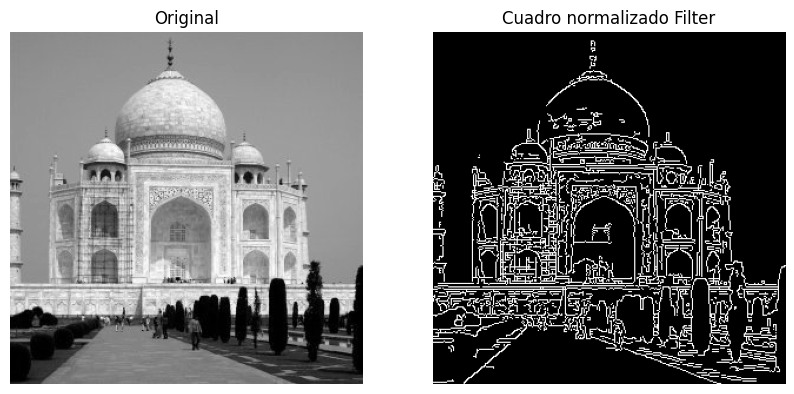

In [47]:
import cv2

img = cv2.imread('filtros/image_3.png', 0)
dst = cv2.Canny(img, 100, 200)

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.axis('off')

plt.subplot(122), plt.imshow(dst, cmap='gray'), plt.title('Cuadro normalizado Filter')
plt.axis('off')

plt.show()